<a href="https://colab.research.google.com/github/Growth-Hackers-SNU/sandbox-youtube-anlaysis/blob/main/code/deeplevel/DunDunDance(%EC%9E%90%EB%AA%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ColabÏùÑ Í∞ÄÏ†ïÌïòÍ≥† Ïì∞Ïó¨ÏßÑ ÏΩîÎìú

## Í∏∞Î≥∏ Ìå®ÌÇ§ÏßÄ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm, tqdm_notebook
import pickle 

import matplotlib.pyplot as plt

In [ ]:
! pip install soynlp

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 419kB 6.7MB/s 


In [ ]:
! pip install kiwipiepy

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.7MB 8.8MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 57.3MB 49kB/s 
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.9.0-cp37-none-any.whl size=57496291 sha256=24382a0a7792d495a2cbf062637e00bb99842d66b5ab7976aedc746ae38c2b52
  Stored in directory: /root/.cache/pip/wheels/61/19/a2/f85a7031e0ff829231b4562e6460a84fef599080bbb2573ef7
Successfully built kiwipiepy-model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ ÏÖã commentA, commentB, commentC Test SetÏùÄ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏäµÎãàÎã§. Validation SetÎßå ÌïòÍ∏∞ÏóêÎèÑ Î∂ÄÏ°±Ìïú Í±∏ 
Youtube_comment_label = pd.read_csv("/content/drive/Shareddrives/[GH x Sandbox]/·Ñé·Ö¨·Ñå·Ö©·Üº·Ñá·ÖÆ·Ü´·ÑÖ·Ö≤/sample_final.csv", index_col = 1)
Youtube_comment_label = Youtube_comment_label[['comment', 'class']]
Youtube_comment_label.head()

comment  class
index                                                          
1                                         Ìù†.. ÏùºÎã® Ï†Ñ ÏïàÎßûÏùÑÎûòÏöî      7
2                                     ÏûêÏãùÏÉàÎÅº ÌÇ§ÏõåÎ¥§Ïûê ÏïÑÎ¨¥ÏÜåÏö©ÏóÖÎã§..      7
3                                                 Î∞©ÌÖåÎÇò„Öã„Öã„Öã      2
4      ÌïòÎûåÎãò Ï†ÄÍ≥†ÎØºÏûàÏñ¥Ïöß!!\nÎÖ∏ÎûòÏûòÎ∂ÄÎ•¥Í≥†Ïã∂ÏùÄÎç∞..Ïñ¥ÎñªÍ≤åÌïòÎ©¥ Ïûò Î∂ÄÎ•ºÏàòÏûàÏùÑÍπåÏöî?Ïò§ÎäòÎèÑ ÏòÅ...      1
5      Ìù¨Ïû¨ÎèÑ Ï§ÄÎπÑÌïòÍ≥†ÏûàÍ≥† Î∞úÌëúÏòàÏ†ïÏù¥ÏòàÏöî\nÎã§Ïãú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî Î™®Îëê Ï§ÄÎπÑÌïòÍ≥†ÏûàÏñ¥Ïöî Í≥ÑÏïΩÎïåÎ¨∏Ïóê...      7

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Ï§ÄÎπÑ

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# 7Î≤à ÌÅ¥ÎûòÏä§ -> 0ÏúºÎ°ú Ï≤òÎ¶¨ : ÎÇòÏ§ëÏóê Ìé∏Ìï©ÎãàÎã§.
Youtube_comment_label.loc[Youtube_comment_label['class'] ==  7, 'class'] = 0
Youtube_comment_label.head()

comment  class
index                                                          
1                                         Ìù†.. ÏùºÎã® Ï†Ñ ÏïàÎßûÏùÑÎûòÏöî      0
2                                     ÏûêÏãùÏÉàÎÅº ÌÇ§ÏõåÎ¥§Ïûê ÏïÑÎ¨¥ÏÜåÏö©ÏóÖÎã§..      0
3                                                 Î∞©ÌÖåÎÇò„Öã„Öã„Öã      2
4      ÌïòÎûåÎãò Ï†ÄÍ≥†ÎØºÏûàÏñ¥Ïöß!!\nÎÖ∏ÎûòÏûòÎ∂ÄÎ•¥Í≥†Ïã∂ÏùÄÎç∞..Ïñ¥ÎñªÍ≤åÌïòÎ©¥ Ïûò Î∂ÄÎ•ºÏàòÏûàÏùÑÍπåÏöî?Ïò§ÎäòÎèÑ ÏòÅ...      1
5      Ìù¨Ïû¨ÎèÑ Ï§ÄÎπÑÌïòÍ≥†ÏûàÍ≥† Î∞úÌëúÏòàÏ†ïÏù¥ÏòàÏöî\nÎã§Ïãú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî Î™®Îëê Ï§ÄÎπÑÌïòÍ≥†ÏûàÏñ¥Ïöî Í≥ÑÏïΩÎïåÎ¨∏Ïóê...      0

In [ ]:
# Í∞Å ÎùºÎ≤® Í∞ØÏàòÍ∞Ä Í∑†ÌòïÎêú Îç∞Ïù¥ÌÑ∞ ÏÖã, Í∑∏ÎÉ• rawÌïú Îç∞Ïù¥ÌÑ∞ ÏÖã Îëê Í∞úÏî© ÌÅ¥ÎûòÏä§ 3Í∞ú, 7Í∞ú Ï¥ù 4Í∞ÄÏßÄ Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÑ ÎßåÎì§ Í≤ÅÎãàÎã§.
Youtube_comment_label3 = Youtube_comment_label.copy()
Youtube_comment_label7 = Youtube_comment_label.copy()
Youtube_comment_label3_balance = Youtube_comment_label.copy()
Youtube_comment_label7_balacne = Youtube_comment_label.copy()

# Youtube_comment_label3
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  1, 'class'] = 1
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  2, 'class'] = 1
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  3, 'class'] = 1
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  4, 'class'] = 2
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  5, 'class'] = 2
Youtube_comment_label3.loc[Youtube_comment_label3['class'] ==  6, 'class'] = 2
Youtube_comment_label3 = Youtube_comment_label3.sort_values(by = 'class', ascending = True).reset_index(drop = True)
print(Youtube_comment_label3.head())
print(f"Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∞ØÏàò : {len(Youtube_comment_label3_balance['comment'])}")
print("-------------------------------------------------------------------------------------------")

# Youtube_comment_label7
Youtube_comment_label7 # Îçî Í±¥ÎìúÎ¶¥ Í≤ÉÏù¥ ÏóÜÎã§
Youtube_comment_label7 = Youtube_comment_label7_balacne.sort_values(by = 'class', ascending = True).reset_index(drop = True)
print(Youtube_comment_label7.head())
print(f"Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∞ØÏàò : {len(Youtube_comment_label7['comment'])}")
print("-------------------------------------------------------------------------------------------")


# Youtube_comment_label3_balance
Youtube_comment_label3_balance = Youtube_comment_label3.copy()
min_class_num = Youtube_comment_label3_balance.groupby(['class'])['comment'].count().min()
Youtube_comment_label3_balance_df = pd.DataFrame(columns = ['comment', 'class'])
for i in range(3):
  Youtube_comment_label3_balance_df = Youtube_comment_label3_balance_df.append(Youtube_comment_label3_balance.loc[Youtube_comment_label3_balance['class'] == i,
                                                                                                                  ['comment', 'class']].sample(min_class_num))
Youtube_comment_label3_balance = Youtube_comment_label3_balance_df.reset_index(drop = True)
print(Youtube_comment_label3_balance.head())
print(f"Í∞Å class Î≥ÑÎ°ú ÎßûÏ∂∞ÏßÑ Í∑†Ìòï Í∞ØÏàòÎäî : {min_class_num}")
print(f"Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∞ØÏàò : {len(Youtube_comment_label3_balance['comment'])} = 3(class Í∞ØÏàò) * {min_class_num}")
print("-------------------------------------------------------------------------------------------")

# Youtube_comment_label7_balance
Youtube_comment_label7_balance = Youtube_comment_label7.copy()
min_class_num = Youtube_comment_label7_balance.groupby(['class'])['comment'].count().min()
Youtube_comment_label7_balance_df = pd.DataFrame(columns = ['comment', 'class'])
for i in range(7):
  Youtube_comment_label7_balance_df = Youtube_comment_label7_balance_df.append(Youtube_comment_label7_balance.loc[Youtube_comment_label7_balance['class'] == i,
                                                                                                                  ['comment', 'class']].sample(min_class_num))
Youtube_comment_label7_balance = Youtube_comment_label7_balance_df.reset_index(drop = True)
print(Youtube_comment_label7_balance.head())
print(f"Í∞Å class Î≥ÑÎ°ú ÎßûÏ∂∞ÏßÑ Í∑†Ìòï Í∞ØÏàòÎäî : {min_class_num}")
print(f"Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∞ØÏàò : {len(Youtube_comment_label7_balance['comment'])} = 7(class Í∞ØÏàò) * {min_class_num}")
print("-------------------------------------------------------------------------------------------")

                                             comment  class
0                                     Ìù†.. ÏùºÎã® Ï†Ñ ÏïàÎßûÏùÑÎûòÏöî      0
1                                    0:18 KITA Ï±Ö „Öã„Öã„Öã      0
2  0:55 Ïùå Ï¥àÍ∏∞Ïóê 65ÏÑ∏ Ïù¥ÏÉÅ ÏïÑÏä§Ìä∏Îùº Ï†úÌïúÌïú Í≤ÉÎèÑ Í∑∏Îü¨Í≥† Ïù¥Í≤ÉÎèÑ Î©¥Ïó≠Î†• Îçî ÎÜíÏùÄ...      0
3                                          Íº¨..Íº¨ÎÅºÏò§..?      0
4                  ÎÇú Îπ®ÎûêÎã§Î•º 'Î∞úÎ†∏Îã§'Î°ú Î¥§ÎÑ§„Öã„Öã„ÖãÏûòÎ™ªÎ≥¥Í≥† Ï†ïÎßêÎÇ¥ÎÇ¥ Ï∂ïÍµ¨Ïù∏Ï§Ñ      0
Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∞ØÏàò : 22000
-------------------------------------------------------------------------------------------
                                             comment  class
0                                     Ìù†.. ÏùºÎã® Ï†Ñ ÏïàÎßûÏùÑÎûòÏöî      0
1                                    0:18 KITA Ï±Ö „Öã„Öã„Öã      0
2  0:55 Ïùå Ï¥àÍ∏∞Ïóê 65ÏÑ∏ Ïù¥ÏÉÅ ÏïÑÏä§Ìä∏Îùº Ï†úÌïúÌïú Í≤ÉÎèÑ Í∑∏Îü¨Í≥† Ïù¥Í≤ÉÎèÑ Î©¥Ïó≠Î†• Îçî ÎÜíÏùÄ...      0
3                                          Íº¨..Íº¨ÎÅºÏ

In [ ]:
Youtube_comment_label3_balance.groupby(['class'])['comment'].count()

class
0    2955
1    2955
2    2955
Name: comment, dtype: int64

In [ ]:
Youtube_comment_label3_balance

comment class
0                Íµ∞Î¶ºÎ≥¥ÎãòÏùò Î±ÉÏÇ¥ÏùÄ ÎÑàÏñ¥Ïñ¥Ïñ¥Ïñ¥Ïñ¥Ïñ¥Ïñ¥Ïñ¥Ïñ¥„Öì„ÖáÎ¨¥............(?)     0
1                                Ï†ÅÏùÑ Ï≤òÏπòÌï†ÎïåÎßàÎã§ ÎèåÏßÑÍ∏∞ Ïø® ÎèÑÎäîÍ≤ÉÍ∞ôÏïÑÏöî     0
2     07:16 ÌòπÏãú Ïù¥Í±∞ Ïû†Îú∞ ÎãòÏù¥ ÎßêÌïú ÏßàÎ¨∏Ïóê Îãµ Ìï¥ÏÑú " Í≥µÎ£° ÎãòÎ≥¥Îã§ Í±∞ÏßÄ Í∞ôÏßÑ Ïïä...     0
3                                              ÏÉùÎß§Ïû•ÏùÄ ÌïúÍµ≠Ïûä     0
4                                           ÏàòÎ†® Î°úÍ±¥ ÏÑùÍ≤Ω ÏÑùÌõà     0
...                                                 ...   ...
8860                                ÏôÄ   ÌûòÎì§Í≤†Îã§\nÏ†úÍ∞Ä  ÏùëÏõêÌï†Í≤åÏöî     2
8861  Í∑∏ÎûòÏÑú Ïôú  ÏèúÍ±∞ÏûÑ?Ïã§Í≤ÄÏóÜÏúºÎãàÍπê Î∂àÌé∏ÌïòÎã§ Î≠êÎì†ÏßÄ ÏÉùÍ∞ÅÏóÜ„ÖáÏù¥ ÌïòÎäî ÎÇòÎùºÍ∞Ä Î∂ÄÎÅÑÎüΩÎã§ Í∞ú...     2
8862   Ïú†Ïù∏Ïî® ÍπîÍπîÏù¥ Í∞ôÏùÄÍ±∞ ÏïàÏûÖÏúºÏãúÎ©¥ ÏïàÎèºÏó¨? „Öã„Öã„Öã ÍπîÍπîÏù¥Í∞Ä Ïä§ÌÉÄÏùºÏùÑ Ï£ΩÏù¥Í≥† ÏûàÏñ¥Ïó¨....     2
8863                           Ï†ÄÎ†áÍ≤å ÌíÄÎ∞úÌïòÍ≥† ÎåÄÏùë ÌïòÎäîÍ±∞Î≥¥Îãà Ï∞îÎ¶∞ÎìØ „Öã„Öã     2
8864       ÏïàÎèº..Ïöî...ÏïÑÌîÑÎ©¥ Î®πÏñ¥ÏïºÎèºÏöî„Öú„Öú„Öú Ïûò Î®πÏñ¥ÏïºÎèºÏöî...ÏïÑÌîÑÎ©¥ Ï†àÎåÄ ÏïàÎèº„Ö†„Ö†„Ö†„Ö†     2

[8865 rows x 2 columns]

In [ ]:
Youtube_comment_label7

comment  class
0                                         Ìù†.. ÏùºÎã® Ï†Ñ ÏïàÎßûÏùÑÎûòÏöî      0
1                                        0:18 KITA Ï±Ö „Öã„Öã„Öã      0
2      0:55 Ïùå Ï¥àÍ∏∞Ïóê 65ÏÑ∏ Ïù¥ÏÉÅ ÏïÑÏä§Ìä∏Îùº Ï†úÌïúÌïú Í≤ÉÎèÑ Í∑∏Îü¨Í≥† Ïù¥Í≤ÉÎèÑ Î©¥Ïó≠Î†• Îçî ÎÜíÏùÄ...      0
3                                              Íº¨..Íº¨ÎÅºÏò§..?      0
4                      ÎÇú Îπ®ÎûêÎã§Î•º 'Î∞úÎ†∏Îã§'Î°ú Î¥§ÎÑ§„Öã„Öã„ÖãÏûòÎ™ªÎ≥¥Í≥† Ï†ïÎßêÎÇ¥ÎÇ¥ Ï∂ïÍµ¨Ïù∏Ï§Ñ      0
...                                                  ...    ...
21995      ÏïÑÏù¥Í≥†...ÎßûÎ≤åÏù¥ÎßòÏúºÎ°úÏç® ÎÑàÎ¨¥ Í∞ôÏù¥ Í∞êÏ†ïÏù¥ÏûÖÏù¥ ÎêòÏñ¥ÏÑú ÎßòÏù¥ ÎÑàÎ¨¥ ÏïÑÌîà ÏÇ¨Í±¥Ïù¥ÏóàÎÑ§Ïöî      6
21996  Ïö∞Î¶¨Í∞ÄÎùΩ Ïö∞Î¶¨ÏÜåÎ¶¨Îäî Ïñ¥ÎñªÍ≤åÎì† Ìì®Ï†ÑÏùåÏïÖÏù¥ ÎêúÎã§Ìï¥ÎèÑ Í∞ÄÏä¥ÏÜçÏóê Ïö∏Î¶ºÏù¥ ÏûàÎÑ§Ïöî..\nÎì£Îã§Î≥¥...      6
21997  ÎÉ•Ïù¥ÏïÑÎπ†Îãò.. Ïä¨ÌîÑÏßÄÎßå Í¥úÏ∞ÆÏùÄÏ≤ôÌïòÏãúÎäî Í≤É Í∞ôÏïÑÏöî... ÌîºÏ∏ÑÏïº Ï°∞Í∏àÎßå Îçî Ïò§Îûò ÏÇ¥ÏïÑÏ§¨...      6
21998                       6:03 Ïß±Íµ¨..?„Öé„ÖéÌïúÍµ≠Îßê ÏßÑÏßú ÎäòÏóàÎã§„Ö†„ÖúÎ°úÎØ∏Ïïº„Ö†      6
21999                                       Í≤∞Íµ≠ Ìå®Î∞∞ÌñàÏñ¥ „Ö†„Ö†„Ö†„Ö†      6

[22000 rows x 2 columns]

In [ ]:
train_data, test_data = train_test_split(Youtube_comment_label7, test_size=1000, random_state=7607)

In [ ]:
X_train = train_data[['comment']]
X_test = test_data[['comment']]
y_train = train_data['class']
y_test = test_data['class']

In [ ]:
X_train

comment
7959                                Ìòï!ÌååÌä∏ÏΩîÏù∏ Ìï¥Î¥ê!„Ñπ„Öá ÌïòÎ£®Ïóê 1cm
2712                                               ÎÅºÏö± Î≤ÑÎ†§
13606                                         Ïôï„Öú„Öú Ï∂ïÌïòÎìúÎ†§Ïöîüíú
18062  0:03„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã...
113                                      " ÏΩúÎùºÎ•º ÎåÄÏã†Ìï† ÏÜåÌôîÏ†ú "
...                                                  ...
12026                        ÎØ∏Ïµ∏Îî∞ÎØ∏Ïµ∏Îî∞ Ïñ¥Î®∏Ïñ¥Î®∏ 5Ïõî Ï≤´Î∞©ÏÜ°Ïù¥Ïïº „Ö†„Ö†„Ö†„Ö†„Ö†„Ö†
17914                            ÍπΩÌåêÏπúÍ≤å ÏïÑÎãàÎùº Ïú†ÌäúÎ∏åÍ∞ÅÏùÑ ÎßåÎì§Ïñ¥Ï£ºÎÑ§ „Öã„Öã
1355            Ï†ÄÍ±∞ ÌïòÏã§Îïå Ìèº Íº≠ Î∞∞Ïö∞ÏÑ∏Ïöî. Ïú†ÌäúÎ∏å Ï∞æÏúºÎ©¥ ÏûàÏñ¥Ïöî. Ï†ÄÎèÑ ÌïòÎÇò ÏûàÏäµÎãàÎã§
12326            Î≥¥ÏÜúÏù¥ ÎÑòÍ∑ÄÏóΩÎã§ Ï†ÄÍ∏∞ ÏßëÏóêÏÑú ÎÇòÍ∞ÄÎ©¥ Î∞îÎã§ÎùºÎãà\nÏ†ÄÎèÑ Ï†ïÎßêÏÇ¥Í≥†Ïã∂ÏùÄÍ≥≥Ïù¥ÎÑ§Ïöî
7004                   „Ö†„Öú Í∏∞ÎåÄÌïòÍ≥†ÏûàÎäîÎç∞ ÎÑàÎ¨¥ ÌóàÎ¨¥Ìï¥Ïú†........ Ïï†Ìîå ÏùºÌï¥Îùº

[21000 rows x 1 columns]

In [ ]:
y_train

7959     0
2712     0
13606    1
18062    2
113      0
        ..
12026    1
17914    2
1355     0
12326    1
7004     0
Name: class, Length: 21000, dtype: int64

## ÌÜ†ÌÅ∞Ìôî
> ÏûêÎ™® ÌÜ†ÌÅ∞ÌôîÎ•º ÏßÑÌñâÌï©ÎãàÎã§.

Ï∂úÏ≤ò: 
https://jins-sw.tistory.com/6

In [ ]:
# ÌÉÄÏûÑ Ïä§ÌÉ¨ÌîÑ ÏÇ≠Ï†ú
p = re.compile('\d+:\d+')

def delete_time_stamp(df):
    for ix, row in tqdm_notebook(df.iterrows()):
        time_stamp_list = p.findall(str(row['comment']))
        new_comment = str(row['comment'])
        for time_stamp in time_stamp_list:
            new_comment = new_comment.replace(time_stamp, '')
        row['comment'] = new_comment.lstrip()
    return df

In [ ]:
delete_time_stamp(X_train)
delete_time_stamp(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


comment
6067                                         Ïôú ÎÇ¥Í∞Ä Îã§ Î∂ÄÎÅÑÎüΩÎÉê
18510                                        Ïù¥Îü∞Ïó¨ÏûêÎèÑÍ≤∞ÌòºÏùÑÌïòÎÑ§Ïöî
20365  „ÖãÎ∞©Ïû•ÏïÑ Í≥µÏã†Î†•Ïù¥ ÏóÜÎäî Ïù∏ÌÑ∞ÎÑ∑Îß§Ï≤¥Ïï†Í∏∞Î•º Ïù¥Î†áÍ≤å Ïï†Í∏∞ÌïúÎã§ÎäîÍ≤ÉÏùÄ ÎãàÍ∞Ä Ïã∏Íµ¨Î¶¨ÎùºÎäîÍ≤ÉÏùÑ Ïï†...
11461                                        Í∑∏ÎßåÌÅº Í∂ÅÍ∏àÌïòÏã†Í±∞ÏßÄ~
12891   Ïã§Ï†úÎ°ú Ïπ®ÌòïÏùÄ ÏÇºÍµ≠ÏßÄÎ•º ÎßéÏù¥ Î™®Î•∏Îã§ ÌïòÏßÄÎßå Ïö∞Î¶¨Í∞Ä Îçî ÎßéÏù¥ Î™®Î•∏Îã§ Ïò§ÌûàÎ†§ Ï¢ãÏïÑ Îã§ Î™∞Îùº
...                                                  ...
2657                             Ï±ÑÍµ¥Ïö©ÏúºÎ°ú Ï†ÄÍ≤å Í∞ÑÎã§Î©¥ Îã§ÌñâÏù¥ÏßÄ ÏïäÏùÑÍπåÏöî?
20007  ÏïÑÏò§ ÌïôÌè≠ Ï¢Ä Ïû†Ïû†Ìï¥ÏßÄÎãàÍπå ÏµúÍ∞ëÏàòÏî®Í∞Ä ÎèåÏïÑÏò§Í≥† Ï§ëÍµ≠Ïù¥ Îòê ÏÉùÎÇúÎ¶¨Î•º ÏπòÍ≥† Î∞©ÏÜ°Íµ≠Îì§ÏùÄ ...
9956   ÏÜîÏßÅÌûà Í∞úÎ•º Î®πÎäîÍ±∞Îäî Î∞òÎåÄ Î™ªÌïòÏßÄÎßå ÎèÑÏ∂ï Í≥ºÏ†ïÏóêÏÑú Í≥†ÌÜµÏóÜÏù¥ Î≥¥ÎÉàÏúºÎ©¥ Ï¢ãÍ≤†Îã§. Í∞ú ÎèÑ...
17310                         ÏïÑ ÎπµÎî©Ïù¥ Í∞ÄÎ†∏Îã§Í≥† ÌôîÎÇ¥ÎäîÍ±∞ Í∞úÏõÉÍ∏∞ÎÑ§ „Öã„Öã„Öã„Ñ±„Öã
17803                       Ïû•ÏûëÏùÑ Ï™ºÍ∞úÎû¨ÎçîÎãà ÎèÑÎÅºÎ•º Ï™ºÍ∞úÍ≥† ÏûàÎàú„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã

[1000 rows x 1 columns]

In [ ]:
X_train

comment
7959                                Ìòï!ÌååÌä∏ÏΩîÏù∏ Ìï¥Î¥ê!„Ñπ„Öá ÌïòÎ£®Ïóê 1cm
2712                                               ÎÅºÏö± Î≤ÑÎ†§
13606                                         Ïôï„Öú„Öú Ï∂ïÌïòÎìúÎ†§Ïöîüíú
18062  „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã...
113                                      " ÏΩúÎùºÎ•º ÎåÄÏã†Ìï† ÏÜåÌôîÏ†ú "
...                                                  ...
12026                        ÎØ∏Ïµ∏Îî∞ÎØ∏Ïµ∏Îî∞ Ïñ¥Î®∏Ïñ¥Î®∏ 5Ïõî Ï≤´Î∞©ÏÜ°Ïù¥Ïïº „Ö†„Ö†„Ö†„Ö†„Ö†„Ö†
17914                            ÍπΩÌåêÏπúÍ≤å ÏïÑÎãàÎùº Ïú†ÌäúÎ∏åÍ∞ÅÏùÑ ÎßåÎì§Ïñ¥Ï£ºÎÑ§ „Öã„Öã
1355            Ï†ÄÍ±∞ ÌïòÏã§Îïå Ìèº Íº≠ Î∞∞Ïö∞ÏÑ∏Ïöî. Ïú†ÌäúÎ∏å Ï∞æÏúºÎ©¥ ÏûàÏñ¥Ïöî. Ï†ÄÎèÑ ÌïòÎÇò ÏûàÏäµÎãàÎã§
12326            Î≥¥ÏÜúÏù¥ ÎÑòÍ∑ÄÏóΩÎã§ Ï†ÄÍ∏∞ ÏßëÏóêÏÑú ÎÇòÍ∞ÄÎ©¥ Î∞îÎã§ÎùºÎãà\nÏ†ÄÎèÑ Ï†ïÎßêÏÇ¥Í≥†Ïã∂ÏùÄÍ≥≥Ïù¥ÎÑ§Ïöî
7004                   „Ö†„Öú Í∏∞ÎåÄÌïòÍ≥†ÏûàÎäîÎç∞ ÎÑàÎ¨¥ ÌóàÎ¨¥Ìï¥Ïú†........ Ïï†Ìîå ÏùºÌï¥Îùº

[21000 rows x 1 columns]

In [ ]:
from kiwipiepy import Kiwi, Option

In [ ]:
from soynlp.hangle import compose, decompose, character_is_korean 
doublespace_pattern = re.compile('\s+') 

def jamo_sentence(sent): 
    def transform(char): 
        if char == ' ': 
            return char 
        cjj = decompose(char) 
        if len(cjj) == 1: 
            return cjj 
        cjj_ = ''.join(c if c != ' ' else '_' for c in cjj) 
        return cjj_ 
    
    sent_ = [] 
    for char in sent: 
        if character_is_korean(char): 
            sent_.append(transform(char)) 
        else: 
            sent_.append(char) 
    sent_ = doublespace_pattern.sub(' ', ''.join(sent_)) 
    return sent_ 
        
def jamo_to_word(jamo): 
    jamo_list, idx = [], 0 
    while idx < len(jamo): 
        if not character_is_korean(jamo[idx]): 
            jamo_list.append(jamo[idx]) 
            idx += 1 
        else: 
            jamo_list.append(jamo[idx:idx + 3]) 
            idx += 3 
            
    word = "" 
    for jamo_char in jamo_list: 
        if len(jamo_char) == 1: 
            word += jamo_char 
        elif jamo_char[2] == "_": 
            word += compose(jamo_char[0], jamo_char[1], " ") 
        else: 
            word += compose(jamo_char[0], jamo_char[1], jamo_char[2]) 
            
    return word

# Ï∂úÏ≤ò: https://joyhong.tistory.com/137 [Ïò≥ÏùÄ Í∏∏Î°ú..]

In [ ]:
X_train = X_train.apply(lambda row : jamo_sentence(str(row['comment'])).strip().split(" "), axis=1)
X_test = X_test.apply(lambda row : jamo_sentence(str(row['comment'])).strip().split(" "), axis=1)

In [ ]:
X_train.head(10)

7959     [„Öé„Öï„Öá!„Öç„Öè_„Öå„Ö°_„Öã„Öó_„Öá„Ö£„Ñ¥, „Öé„Öê_„ÖÇ„Öò_!„Ñπ__„Öá__, „Öé„Öè_„Ñπ„Öú_„Öá„Öî_, 1cm]
2712                                      [„Ñ≤„Ö£_„Öá„Öú„Ñ±, „ÖÇ„Öì_„Ñπ„Öï_]
13606                        [„Öá„Öò„Öá_„Öú__„Öú_, „Öä„Öú„Ñ±„Öé„Öè_„Ñ∑„Ö°_„Ñπ„Öï_„Öá„Öõ_üíú]
18062    [„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__...
113                [", „Öã„Öó„Ñπ„Ñπ„Öè_„Ñπ„Ö°„Ñπ, „Ñ∑„Öê_„ÖÖ„Ö£„Ñ¥„Öé„Öè„Ñπ, „ÖÖ„Öó_„Öé„Öò_„Öà„Öî_, "]
10226              [„Öà„Öó_„Öé„Öò_„ÖÖ„Öú_„Ñ¥„Ö°„Ñ¥, „Öá„Ö£„Ñπ„Ñ±„Öê_„Öá„Ö†_„Öå„Ö†_„ÖÇ„Öì_„Ñ±„Ö£„Ñ¥, „Öé„Öè„ÖÅ]
3676             [„ÖÅ„Öì„ÖÖ„Ñ∑„Öó_„ÖÅ„Öó_„Ñπ„Ö°_„Ñ±„Öó_, „ÖÖ„Ö£„Ñ¥„Ñ¥„Öè„Ñπ, „Ñ¥„Öè_„Öá„Ö£_, „Öã__„Öã__]
4663                                             [„Öá„Ö£„Ñ±„ÖÖ„Öú_?]
10882    [„Öé„Öì„Ñπ, „Ñ±„Öú_„Ñ±„Ö°„Ñπos„Ñπ„Öè_„Ñ¥„Ö£_, „Öá„Öù_„Öä„Ö£_3, „Öá„Öè„Ñ¥, „ÖÖ„Öè_„Ñ±„Ö£„Ñπ, „Öà„Öè...
17947                      [„ÖÅ„Öè_„Öà„Ö£_„ÖÅ„Öè„Ñ±, „ÖÅ„Öù_„Ñ¥„Öë_„Ñ±„Öó„Öã„Öã__„Öã__„Öã__]
dtype: object

## ÏûÑÎ≤†Îî©
> Ïù¥Ï†ú ÏûÑÎ≤†Îî©ÏùÑ Ìï¥Î¥ÖÏãúÎã§
> ÏûÑÎ≤†Îî©ÏùÄ ÌÅ¨Í≤å 3Í∞ÄÏßÄÍ∞Ä ÏûàÏóàÏäµÎãàÎã§.
1. Î™®Îç∏ÏùÑ ÏÑ∏Ïö∏Îïå ÏûÑÎ≤†Îî© Ï∏µÏùÑ ÎÑ£Îäî Í≤É(Ïù¥ÎïåÎäî Ï£ºÎ°ú freeze ÌïòÏßÄ ÏïäÍ≥† ÏûÑÎ≤†Îî©ÎèÑ ÌïôÏäµÌïòÍ≤å Ìï©ÎãàÎã§)
2. gensim Ïùò Word2Vec, FastText Îì± ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú pre-trained ÏãúÌÇ§Í≥† Í∑∏Í±∞ ÏÇ¨Ïö©ÌïòÍ∏∞
3. Ïò®ÎùºÏù∏ ÏÉÅÏùò pre-trained Í∞ÄÏ†∏ÏôÄÏÑú ÌïòÍ∏∞.

### 2. FastTextÎ°ú pre-trained ÏãúÌÇ§Í≥† Ïù¥Î•º ÏÇ¨Ïö©Ìï¥ÏÑú embedding

Ï∂úÏ≤ò: https://joyhong.tistory.com/137

#### Merge Whole Data

In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
data_DIR = "/content/drive/Shareddrives/[GH x Sandbox]/train/"
file_name_num = [4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,51]

files = [f for f in listdir(data_DIR) if isfile(join(data_DIR, f))]
video_stats = [f for f in files if '.csv' in f and 'video' in f]
files = [f for f in files if '.csv' in f and 'comments' in f]
print(files)

df_dict = dict()
for file_name in tqdm(files):
    comment_name = file_name.split('.')[0]
    df = pd.read_csv(data_DIR + file_name, lineterminator='\n')

    df_dict[comment_name] = df

['comments_6.csv', 'comments_4.csv', 'comments_5.csv', 'comments_11.csv', 'comments_7.csv', 'comments_9.csv', 'comments_10.csv', 'comments_12.csv', 'comments_13.csv', 'comments_14.csv', 'comments_16.csv', 'comments_15.csv', 'comments_17.csv', 'comments_18.csv', 'comments_19.csv', 'comments_20.csv', 'comments_21.csv', 'comments_23.csv', 'comments_25.csv', 'comments_51.csv']


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:08<00:00,  2.40it/s]


In [ ]:
whole_df = pd.DataFrame(columns=df_dict['comments_4'].columns)

for category, df in df_dict.items():
    df['category_id'] = int(category.split('_')[1])
    whole_df = pd.concat([whole_df, df], ignore_index=True)

whole_df.tail(10)

ch_id  ... category_id
1136000  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0
1136001  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0
1136002  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0
1136003  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0
1136004  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0
1136005  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0
1136006  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0
1136007  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0
1136008  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0
1136009  UCta_NRwnsUaew0t3VNxBNyg  ...        51.0

[10 rows x 10 columns]

In [ ]:
len(whole_df)

1136010

#### Fast Text Modeling

In [ ]:
from gensim.models import FastText

In [ ]:
whole_df['comment'][4]

'5:31 Ïù¥Îü¨Îã§Í∞Ä ÏÑúÎ™ÖÌò∏ ÎÇòÏ§ëÏóê Ï∫êÎüøÎì§ÏùÄ Ï†ïÎßê Ïú†ÎÇúÏä§Îü¨Ïö¥ Ï°¥Ïû¨ÏóêÏöî Ïù¥Îü¨Î©¥ Ïñ¥Îñ°Ìï®'

In [ ]:
whole_comment_df = whole_df[['comment']]
whole_comment_df = delete_time_stamp(whole_comment_df)
whole_comment_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


comment
0  ÏïÑÎãà Ï†ïÌïúÏù¥ ÏàôÏÜå Ï∞ΩÎ¨∏Ïóê xÏûê ÎåÄÎ¨∏ÏßùÎßåÌïòÍ≤å ÌÖåÏù¥ÌîÑ Î∂ôÏó¨ÎÜìÏùÄÍ±∞ K ÏïÑÏù¥Îèå - Ï∞ΩÎ¨∏Ïù¥Îùº...
1  ÏïÑÎãà Ïã¨ÏßÄÏñ¥ Í∑∏ Î∞© Ïú§Ï†ïÌïúÎ∞© Ï∞ΩÎ¨∏Ïù¥ ÏïÑÎãàÎùº Ïù¥ÏßÄÌõàÎ∞© Ï∞ΩÎ¨∏ÏïÑÎãò ? „Öã„Ñ≤„Öã„Ñ±„Öã„Ñ±„Öã„Öã„Öã„Ñ±...
2  Ïù¥Í±∞Ïù¥Í±∞ Ï°∞ÏÇ¨Î•º Ïó¥Ïã¨Ìûà ÌïòÏã†Í±¥ÏßÄ Ïù¥Í±∞ Ï∫êÎüøÏïÑÎãàÎ©¥ Ïù¥Î†áÍ≤å Ìï† ÏàòÍ∞Ä ÏóÜÎäîÎç∞..?Ïï†Îì§ ÏÑ†...
3  ÎØºÍ∑úÎûë Ï†ïÌïúÏù¥ ÎπÑÏ£ºÏñºÌï© Ï¢ãÏùÄÍ±∞ ÏïåÍ≥†ÏûàÏóàÏßÄÎßå Ïù¥Î†áÍ≤å Î≥¥ÎãàÍπå ÏßÑÏßúÏµúÍ≥†ÎÑ§„Ö†„Ö†„Ö†„Ö†„Ö† ÏõêÏö∞Îûë...
4            Ïù¥Îü¨Îã§Í∞Ä ÏÑúÎ™ÖÌò∏ ÎÇòÏ§ëÏóê Ï∫êÎüøÎì§ÏùÄ Ï†ïÎßê Ïú†ÎÇúÏä§Îü¨Ïö¥ Ï°¥Ïû¨ÏóêÏöî Ïù¥Îü¨Î©¥ Ïñ¥Îñ°Ìï®
5                  ÍπÄÎØºÍ∑úÍ∞Ä ÏÇ¥ÏïÑ ÏõÄÏßÅÏù∏Îã§ÎäîÍ≤ÉÏóê Í∞êÏÇ¨Ìï®ÏùÑ ÎäêÎÇå... ÎØºÍ∑úÏïº„Ö†„Ö†„Ö†
6  ÎÑàÎ¨¥ ÏõÉÏñ¥ÏÑú Í¥ëÎåÄÍ∞Ä ÏïÑÌîÑÎã§...„Öã„Öã„Öã„Ñ≤„Öã„Öã„Öã„Öã„ÖãÎ≠îÍ∞Ä Ï†Ä Ï°∞Ìï© ÏùÄÏùÄÌïòÍ≤å ÏõÉÍ≤®ÏÑú Îçî Ïû¨...
7  Îã§Îì§ ÎäêÍºàÍµ¨ÎÇò... Ïù¥ ÏòÅÏÉÅÏóêÏÑú Ï∞êÌïú Ï∫êÎüøÏùò Ìñ•Í∏∞Í∞Ä ÎÇòÎäîÍ±∏...„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã...
8  Ï∫êÎüøÎì§üíé Ï§åÌÑ∞Î∑∞ÎøêÎßå ÏïÑÎãàÎùº ÏûÖÌãÄÎßâÌïòÍ≤å ÎßåÎìúÎäî ÎîîÏßÄÌÑ∏ ÌïÑÎ¶Ñ ÏòÅÏÉÅÎèÑ ÎÇ®ÏïòÏúºÎãà ,, ÏÑ∏Î∏ê...
9             ÎîîÏóêÏûá ÏÑπÏãúÌï¥. ÎÇò ÎØ∏Ï≥ê Ïñ¥Ï©úÏ¢ãÏïÑ. \nÎ™ÖÌò∏ Î®∏Î¶¨ ÍπêÍ±∞ ÏßÑÏßú ÏßÑÎ¶¨Îã§.

In [ ]:
corpus = whole_comment_df.apply(lambda row : jamo_sentence(str(row['comment'])), axis=1)
corpus = [sent.strip().split(" ") for sent in corpus]
corpus[:10]

[['„Öá„Öè_„Ñ¥„Ö£_',
  '„Öà„Öì„Öá„Öé„Öè„Ñ¥„Öá„Ö£_',
  '„ÖÖ„Öú„Ñ±„ÖÖ„Öó_',
  '„Öä„Öè„Öá„ÖÅ„Öú„Ñ¥„Öá„Öî_',
  'x„Öà„Öè_',
  '„Ñ∑„Öê_„ÖÅ„Öú„Ñ¥„Öâ„Öè„Ñ±„ÖÅ„Öè„Ñ¥„Öé„Öè_„Ñ±„Öî_',
  '„Öå„Öî_„Öá„Ö£_„Öç„Ö°_',
  '„ÖÇ„Öú„Öå„Öá„Öï_„Ñ¥„Öó„Öé„Öá„Ö°„Ñ¥„Ñ±„Öì_',
  'K',
  '„Öá„Öè_„Öá„Ö£_„Ñ∑„Öó„Ñπ',
  '-',
  '„Öä„Öè„Öá„ÖÅ„Öú„Ñ¥„Öá„Ö£_„Ñπ„Öè_„Ñ±„Öó_',
  '„Öá„Ö£„Ñ¥„Öå„Öì_„Ñ¥„Öî„ÖÖ„Öá„Öî_',
  '„Ñ∑„Öó_„Ñ¥„Ö°„Ñ¥„Ñ±„Öì_',
  '„ÖÇ„Öó_„Ñ±„Öó_',
  '„ÖÉ„Öè„Öá„Öå„Öì_„Öà„Ö£„ÖÅ',
  '„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__„Öã__'],
 ['„Öá„Öè_„Ñ¥„Ö£_',
  '„ÖÖ„Ö£„ÖÅ„Öà„Ö£_„Öá„Öì_',
  '„Ñ±„Ö°_',
  '„ÖÇ„Öè„Öá',
  '„Öá„Ö†„Ñ¥„Öà„Öì„Öá„Öé„Öè„Ñ¥„ÖÇ„Öè„Öá',
  '„Öä„Öè„Öá„ÖÅ„Öú„Ñ¥„Öá„Ö£_',
  '„Öá„Öè_„Ñ¥„Ö£_„Ñπ„Öè_',
  '„Öá„Ö£_„Öà„Ö£_„Öé„Öú„Ñ¥„ÖÇ„Öè„Öá',
  '„Öä„Öè„Öá„ÖÅ„Öú„Ñ¥„Öá„Öè_„Ñ¥„Ö£„ÖÅ',
  '?',
  '„Öã__„Ñ≤__„Öã__„Ñ±__„Öã__„Ñ±__„Öã__„Öã__„Öã__„Ñ±__„Öã__„Ñ±__„Öã__„Ñ±__„Öã__„Ñ±__'],
 ['„Öá„Ö£_„Ñ±„Öì_„Öá„Ö£_„Ñ±„Öì_',
  '„Öà„Öó_„ÖÖ„Öè_„Ñπ„Ö°„Ñπ',
  '„Öá„Öï„Ñπ„ÖÖ„Ö£„ÖÅ„Öé„Ö£_',
  '„Öé„Öè_„ÖÖ„Ö£„Ñ¥„Ñ±„

In [ ]:
model = FastText(size=100, window=3, min_count=3, workers=4, sg=1)
model.build_vocab(sentences=corpus)
model.train(
    sentences=corpus, epochs=model.epochs,
    total_examples=model.corpus_count, total_words=model.corpus_total_words,
)

In [ ]:
# save model
model_fDIR = "/content/drive/MyDrive/GH/SandBoxProject/210524_DL/"
model.save(model_fDIR + 'fasttext')
model.wv.save_word2vec_format(model_fDIR + 'fasttext_vis')

In [ ]:
print(model.wv)

In [ ]:
model.wv.vectors.shape

(283367, 100)

#### embedding ÏÑ±Îä• test

In [ ]:
def transform(list_): 
    return [(jamo_to_word(w), r) for (w, r) in list_]


In [ ]:
print(transform(model.wv.most_similar(jamo_sentence('ÏÜêÌù•ÎØº'), topn=5)))

[('‚ÄúÏÜêÌù•ÎØº', 0.992994487285614), ("'ÏÜêÌù•ÎØº", 0.992006778717041), ('"ÏÜêÌù•ÎØº', 0.9919321537017822), ('ÏÜêÌù•ÎØº?', 0.9894469976425171), ('ÏÜêÌù•ÎØº.', 0.9882667660713196)]


In [ ]:
print(transform(model.wv.most_similar(jamo_sentence('Ïû¨ÎØ∏'), topn=5)))

[('Ïû¨ÎØ∏ÏíÄ', 0.9453452229499817), ('Ïû¨ÎØ∏ÏîÄ', 0.9396107196807861), ('Ïû¨ÎØ∏Îî∞', 0.9187890887260437), ('Ïû¨ÎØ∏Ïç®', 0.9178105592727661), ('Ïû¨ÎØ∏Ï†∏', 0.9103113412857056)]


In [ ]:
print(transform(model.wv.most_similar(jamo_sentence('Ïä¨Ìîî'), topn=5)))

[('Ïä¨Ìîî,', 0.9623531103134155), ('Ïä¨Ìîî..', 0.9216196537017822), ('Ïä¨Ìîå', 0.9023023843765259), ('Ïä¨ÌîÑÎã®', 0.8952683210372925), ('Ïä¨ÌîÑÎãπ..', 0.8917639851570129)]


In [ ]:
print(transform(model.wv.most_similar(jamo_sentence('Ï£ºÎã®ÌÉú'), topn=5)))

[('Ï£ºÎã®ÌÉú-', 0.9942590594291687), ('Ï£ºÎã®ÌÉú~', 0.9901915192604065), ('Ï£ºÎã®ÌÉ†', 0.9890368580818176), ('Ï£ºÎã®ÌÉ±-', 0.9884690642356873), ('Ï£ºÎã®ÌÉ±,', 0.985360860824585)]


In [ ]:
print(transform(model.wv.most_similar(jamo_sentence('Î¨¥Î¶¨Îâ¥'), topn=5)))

[('Î¨¥Î¶¨Îâ¥:', 0.99093097448349), ('Î¨¥Î¶¨Îâ¥~', 0.9878108501434326), ('‚ñ†Î¨¥Î¶¨Îâ¥', 0.9823281168937683), ('‚ÄúÎ¨¥Î¶¨Îâ¥', 0.9820902943611145), ("'Î¨¥Î¶¨Îâ¥", 0.9820272922515869)]


In [ ]:
model.wv.n_similarity([jamo_sentence("ÏÜêÌù•ÎØº")], [jamo_sentence("Î¨¥Î¶¨Îâ¥")])

0.6619248

In [ ]:
model.wv.n_similarity([jamo_sentence("ÏÜêÌù•ÎØº")], [jamo_sentence("Ï£ºÎã®ÌÉú")])

0.3717371

In [ ]:
model.wv.n_similarity([jamo_sentence("ÏÜêÌù•ÎØº")], [jamo_sentence("Î®πÎ∞©")])

0.16442917

In [ ]:
model.wv.n_similarity([jamo_sentence("ÏÜêÌù•ÎØº")], [jamo_sentence("Ï∂ïÍµ¨")])

0.53428406

In [ ]:
model.wv.n_similarity([jamo_sentence("Î®∏ÎãàÍ≤åÏûÑ")], [jamo_sentence("ÏµúÏï†")])

0.27210534

In [ ]:
model.wv.n_similarity([jamo_sentence("Î®∏ÎãàÍ≤åÏûÑ")], [jamo_sentence("ÏßÑÏö©ÏßÑ")])

0.46752903

In [ ]:
model.wv.n_similarity([jamo_sentence("Î®∏ÎãàÍ≤åÏûÑ")], [jamo_sentence("Í≥µÌòÅÏ§Ä")])

0.48653892

In [ ]:
model.wv.n_similarity([jamo_sentence("ÏÇ∞Î≤î")], [jamo_sentence("Í≥µÌòÅÏ§Ä")])

0.7007195

In [ ]:
model.wv.n_similarity([jamo_sentence("Î¨¥Î¶¨Îâ¥")], [jamo_sentence("Í≥µÌòÅÏ§Ä")])

0.46512252

In [ ]:
model.wv.n_similarity([jamo_sentence("Ìä∏Î°úÌä∏")], [jamo_sentence("Í≥µÌòÅÏ§Ä")])

0.20399697

#### embedding Îêú vector ÌôïÏù∏

Ï∂úÏ≤ò: https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html

In [ ]:
model.wv[jamo_sentence("ÏÜêÌù•ÎØº")]

array([ 0.57643384, -1.6414546 , -0.24552028, -0.7539332 ,  0.26678166,
        0.35393393, -0.6679476 , -0.6489672 , -0.45171592,  1.4473842 ,
       -0.7428063 , -0.91519433, -0.18956031, -0.34081066, -0.20836973,
        0.56054896, -0.6017387 ,  0.5482094 ,  1.9174218 , -0.9578388 ,
       -0.3180518 , -0.80016017, -1.1227124 ,  0.5960045 ,  0.5047069 ,
        0.628457  , -0.10020398, -2.264909  ,  0.42326355, -0.15910032,
        1.271285  ,  0.55241126,  0.09666578, -0.14403383, -1.6420062 ,
       -0.1275214 , -0.9844335 ,  0.862227  , -0.15074115,  0.49015576,
       -0.16454384,  0.51263183, -0.25504604,  0.23586483,  0.3706472 ,
        1.1367676 , -0.6912528 , -1.1284872 , -0.5130195 ,  0.57426614,
       -0.2588535 , -0.788596  , -1.5116447 ,  0.4324854 ,  1.0688583 ,
       -0.38725674, -0.57333475, -1.1115502 ,  0.27542108, -0.2430949 ,
        0.9331736 , -0.23279065, -0.5711133 , -0.06201376,  0.9205951 ,
       -0.99871296, -0.8155388 ,  0.71681225,  0.82432145, -1.85

In [ ]:
model.wv[jamo_sentence("Î¨¥Î¶¨Îâ¥")]

array([ 0.50575805, -0.76800334,  0.07831834, -0.5791681 ,  0.08383565,
       -0.19101423, -0.6039074 , -0.5175718 , -0.32549435,  1.089218  ,
       -0.07534763, -0.6464316 ,  0.90763557, -0.3388166 ,  0.07145465,
        0.4129103 , -1.2022424 ,  0.9761676 ,  0.72677225,  0.07222657,
       -0.6708291 , -0.08267989, -0.50139266, -0.21877243,  1.0338358 ,
       -0.20215616,  0.19997585, -0.8877196 ,  1.0351778 , -0.581828  ,
        1.082519  , -0.00622828,  0.27039063, -0.43332633, -0.25265127,
       -0.46708018, -0.04878039,  0.67188054,  0.49335584,  0.7747082 ,
        0.1857629 ,  0.8365447 , -0.58299357, -0.48687133,  0.38403544,
        1.1583533 , -0.26721588, -0.12822069, -0.66785127,  0.40065596,
       -0.43852365,  0.40031043, -0.31475472, -0.17877993,  0.97563565,
       -0.06083592, -0.35537547, -0.9579187 , -0.18720272, -0.6509618 ,
        1.2590991 ,  0.21215816,  0.37022042,  0.14629762,  0.71335566,
       -0.78622144, -0.51695114,  0.27750993, -0.11644801, -1.12

In [ ]:
model.wv[jamo_sentence("Ïùò")]

array([ 1.4210777 , -0.81371677, -0.03749328,  1.1420807 ,  1.3048111 ,
       -2.1337779 ,  0.48601452,  1.6949412 , -1.8845116 ,  0.2717323 ,
       -0.5499069 , -0.10699414, -0.21678694, -0.23970495, -1.7765076 ,
       -0.7156523 ,  1.3386067 ,  1.9705166 , -0.41027206,  1.6301857 ,
        1.4153467 ,  0.25995895, -2.9717543 ,  0.00916565,  1.8039497 ,
        1.9130538 , -2.2541816 ,  2.2106493 ,  1.8905944 ,  1.9232124 ,
       -0.43900123, -0.40546915, -0.12867054,  0.8294946 , -0.7779432 ,
       -3.1666255 , -0.4517913 , -0.02292189, -0.33861905,  0.8084839 ,
        2.359629  ,  2.15161   , -2.1715438 , -0.89377385, -0.18682726,
        0.6211433 , -2.900708  ,  1.17369   , -1.8680288 , -0.05298661,
        2.321277  ,  0.9144438 ,  0.32484016, -0.27662602,  1.0084343 ,
        0.49707267,  0.9757298 ,  0.2192508 , -0.30422705, -1.0776116 ,
        0.23088615, -0.43616104,  1.2460271 ,  1.5946913 ,  1.2349356 ,
        2.286337  , -0.5992277 ,  0.12026838,  0.25284907, -2.48

In [ ]:
model.wv[jamo_sentence("ÏÇ¨Îûë")]

array([-0.6993194 , -0.6766508 ,  1.0852938 ,  1.4949514 ,  0.24718733,
       -0.19989447, -1.083013  ,  1.5152607 ,  0.0308862 ,  1.5063288 ,
        2.6923752 , -1.0928504 , -0.40414062,  0.7002441 ,  1.7981144 ,
       -0.6643979 , -0.2528179 , -0.85075057,  3.4187324 , -0.21016872,
       -1.0372633 ,  0.0653699 , -1.1205925 ,  0.48261562, -0.59057456,
       -2.7071092 ,  1.2039386 ,  0.08677571, -0.22625491, -1.4512116 ,
       -1.9846793 , -0.9723848 ,  0.3016936 ,  0.8163773 ,  0.8181408 ,
        0.03225449,  0.5289174 , -0.31768593, -0.19539957, -0.42638075,
       -0.33651716, -0.52423906, -0.17983942, -0.03452187, -0.87619895,
       -0.14652275, -1.5226325 ,  0.06480377,  0.57030976, -0.257104  ,
        1.694818  ,  1.1884979 , -1.8981036 , -1.1742886 ,  2.2253165 ,
       -0.85738844, -0.4097028 , -0.2864902 ,  0.80733097,  0.18326712,
        0.3484178 , -0.5570772 , -0.5772124 , -0.40836114,  1.1699841 ,
       -0.9056703 ,  0.7106095 ,  0.18948205,  0.29488817, -0.55

#### Embedding Ï∏µ ÌïôÏäµÏãúÌÇ§Í∏∞

##### Preprocess for model input

In [ ]:
from gensim.models import KeyedVectors, FastText

In [ ]:
model_fname = "/content/drive/Shareddrives/[GH x Sandbox]/code/DeepLevel/fasttext/jamo_fasttext"
embedding_model = FastText.load(model_fname)

In [ ]:
embedding_model.wv.vectors.shape

(283367, 100)

In [ ]:
embedding_matrix = np.zeros((embedding_model.wv.vectors.shape[0]+1, embedding_model.wv.vectors.shape[1]))
np.shape(embedding_matrix)

(283368, 100)

In [ ]:
vocab_size = np.shape(embedding_matrix)[0]
vocab_size

283368

##### FastTextÏùò embeding vector ÌôïÏù∏ÏûëÏóÖ 

In [ ]:
embedding_model.wv.vocab

{'„Öá„Öè_„Ñ¥„Ö£_': <gensim.models.keyedvectors.Vocab at 0x7f1314e2dcd0>,
 '„Öà„Öì„Öá„Öé„Öè„Ñ¥„Öá„Ö£_': <gensim.models.keyedvectors.Vocab at 0x7f1315739a10>,
 '„ÖÖ„Öú„Ñ±„ÖÖ„Öó_': <gensim.models.keyedvectors.Vocab at 0x7f1315739bd0>,
 '„Öä„Öè„Öá„ÖÅ„Öú„Ñ¥„Öá„Öî_': <gensim.models.keyedvectors.Vocab at 0x7f1315739fd0>,
 '„Ñ∑„Öê_„ÖÅ„Öú„Ñ¥„Öâ„Öè„Ñ±„ÖÅ„Öè„Ñ¥„Öé„Öè_„Ñ±„Öî_': <gensim.models.keyedvectors.Vocab at 0x7f1315739c90>,
 '„Öå„Öî_„Öá„Ö£_„Öç„Ö°_': <gensim.models.keyedvectors.Vocab at 0x7f1315739710>,
 'K': <gensim.models.keyedvectors.Vocab at 0x7f1315739b90>,
 '„Öá„Öè_„Öá„Ö£_„Ñ∑„Öó„Ñπ': <gensim.models.keyedvectors.Vocab at 0x7f1315739f90>,
 '-': <gensim.models.keyedvectors.Vocab at 0x7f1315739f10>,
 '„Öá„Ö£„Ñ¥„Öå„Öì_„Ñ¥„Öî„ÖÖ„Öá„Öî_': <gensim.models.keyedvectors.Vocab at 0x7f1315739490>,
 '„Ñ∑„Öó_„Ñ¥„Ö°„Ñ¥„Ñ±„Öì_': <gensim.models.keyedvectors.Vocab at 0x7f1315739310>,
 '„ÖÇ„Öó_„Ñ±„Öó_': <gensim.models.keyedvectors.Vocab at 0x7f1315739450>,
 '„ÖÉ„Öè„Öá„Öå„Öì_„Öà„Ö£„ÖÅ': <gensim.models.keye

In [ ]:
embedding_model.wv.vocab['„Öá__']

In [ ]:
test_str = 'Ïù¥Ìö®Î∞∞'
try:
    embedding_model.wv.vocab[jamo_sentence(test_str)]
except:
    print(f"{test_str} is not in wv.vocab")

Ïù¥Ìö®Î∞∞ is not in wv.vocab


In [ ]:
try:
    embedding_model.wv.index2word.index(jamo_sentence(test_str))
except:
    print(f"{test_str} is not in wv")

Ïù¥Ìö®Î∞∞ is not in wv


In [ ]:
try:
    print(embedding_model.wv.get_vector(jamo_sentence(test_str)))
except:
    print(f"{test_str}'s vector cannot be computed")

[-0.37403655  0.19651023  0.11929256 -0.02654292  0.5206497   0.02764431
 -0.49339563  0.18313037  0.00155129  0.5843913   0.21148854 -0.17790422
 -0.4318161  -0.2522056  -0.38778958  0.11212477 -1.2797831  -0.27379298
  0.42056373 -0.38070545 -0.7472793  -0.34145415 -0.23099454 -0.08130452
  0.2458399   0.01194939  0.16582264 -0.23610143 -0.3233421  -0.30369434
  0.23559421  0.45279443 -0.08031224  0.37099707 -0.6369605   0.05327706
 -0.3464001  -0.34033656  0.43969962  0.21471928  0.8727519  -0.44991803
 -0.05010193 -0.41895708  0.47782835  0.45255774 -0.6736622   0.26439163
 -0.54832244  0.26810032  0.404838   -0.05194169 -1.0068007  -0.0334061
  0.53493667 -0.06614195  0.08650637 -0.75539285 -0.5632158  -0.35702547
  0.3789106   0.01599285  0.20340548  0.40650192  0.5133192   0.68571496
 -0.36023414  0.27157545 -0.55225766 -1.1147113   0.68698704 -0.7739677
 -0.0582931  -0.18629786 -0.41507697 -0.76411766  0.2350322  -0.41220742
 -0.13564985  0.27068695 -0.18568334  0.2893728   0.4

**Î¨∏Ï†úÏ†ê: FastTextÎäî vocabÏóê ÏóÜÎäî Îã®Ïñ¥ÎèÑ vectorÍ∞íÏúºÎ°ú embedding Ìï† Ïàò ÏûàÎã§**

Ïù¥Î•º modelingÌï† Îïå Ï∞∏Í≥†ÌïúÎã§Î©¥, trainÍ≥º test dataÎ•º Ìï©Ïπú corpusÎ•º Ïù¥Ïö©Ìï¥ÏÑú sen->seq Ìï®ÏàòÎ•º ÎßåÎì§Í≥†, embedding matrixÎ•º ÎßåÎì§Ïñ¥Ïïº ÌïúÎã§.
Ïù¥Î•º Ìïú Î≤àÏóê Ìï¥Í≤∞Ìï¥ Ï£ºÎäî FastText embedderÍ∞Ä Ïôú ÏóÜÏßÄ?

In [ ]:
embedding_model.wv.vectors[0]

array([-0.35807574,  0.24967086, -0.39211652,  0.22270921, -0.30095124,
       -0.26930484, -0.03055471,  0.41335186, -0.10280499,  1.0449572 ,
        0.38705868,  0.25030985,  0.5340444 , -0.11750946, -0.08750965,
        0.6022821 , -0.7128501 ,  0.28803402,  0.6250402 , -0.7274412 ,
       -0.38887247, -0.8217862 ,  0.23845713,  0.21378914, -0.11827174,
        0.5607895 , -0.0617753 ,  0.48724902, -0.7959248 , -1.3584498 ,
        0.05636201,  0.11509445,  0.2918855 ,  0.14894316, -1.5500443 ,
        0.8018711 ,  0.74725366,  0.66799784,  0.0449916 ,  1.635262  ,
        0.19985682, -0.44706652,  0.01261949, -0.24851829,  0.59905064,
        1.255239  , -0.36310238,  0.61766183, -1.0230314 ,  0.11231538,
        0.19976164, -0.6234934 , -0.20289727,  0.4597294 ,  0.7228388 ,
        0.2155575 , -0.50266254, -0.46275043, -0.02873549,  0.60092735,
        0.9514901 , -0.03955876, -0.46764556,  0.25555587,  0.6284891 ,
       -0.3047173 , -0.29829472, -0.07919572, -0.2810281 , -0.86

In [ ]:
embedding_model.wv.index2word[0]

'„Öà„Ö£„Ñ¥„Öâ„Öè_'

In [ ]:
embedding_model.wv.index2word.index('„Öà„Ö£„Ñ¥„Öâ„Öè_')

0

In [ ]:
embedding_model.wv.get_vector('„Öà„Ö£„Ñ¥„Öâ„Öè_')

array([-0.35807574,  0.24967086, -0.39211652,  0.22270921, -0.30095124,
       -0.26930484, -0.03055471,  0.41335186, -0.10280499,  1.0449572 ,
        0.38705868,  0.25030985,  0.5340444 , -0.11750946, -0.08750965,
        0.6022821 , -0.7128501 ,  0.28803402,  0.6250402 , -0.7274412 ,
       -0.38887247, -0.8217862 ,  0.23845713,  0.21378914, -0.11827174,
        0.5607895 , -0.0617753 ,  0.48724902, -0.7959248 , -1.3584498 ,
        0.05636201,  0.11509445,  0.2918855 ,  0.14894316, -1.5500443 ,
        0.8018711 ,  0.74725366,  0.66799784,  0.0449916 ,  1.635262  ,
        0.19985682, -0.44706652,  0.01261949, -0.24851829,  0.59905064,
        1.255239  , -0.36310238,  0.61766183, -1.0230314 ,  0.11231538,
        0.19976164, -0.6234934 , -0.20289727,  0.4597294 ,  0.7228388 ,
        0.2155575 , -0.50266254, -0.46275043, -0.02873549,  0.60092735,
        0.9514901 , -0.03955876, -0.46764556,  0.25555587,  0.6284891 ,
       -0.3047173 , -0.29829472, -0.07919572, -0.2810281 , -0.86

In [ ]:
len(embedding_model.wv.index2word)

283367

In [ ]:
try:
    embedding_model.wv.index2word.index('ÌûàÌûà')
except:
    print("'ÌûàÌûà' is not in list")

'ÌûàÌûà' is not in list


##### change train data to integer vector (token -> integer)

In [ ]:
def sen_to_seq(s_list): # s = ['„Öá„Ö£_„Öé„Öõ_„ÖÇ„Öê_', '„ÖÇ„Öè_„ÖÇ„Öó_']
    seq = list()
    for s in s_list:
        try:
            seq_value = embedding_model.wv.index2word.index(s)+1
        except:
            seq_value = 0 # ÏóÜÏúºÎ©¥ 0
        seq.append(seq_value)
    return seq

In [ ]:
X_train.iloc[0]

['„Öé„Öï„Öá!„Öç„Öè_„Öå„Ö°_„Öã„Öó_„Öá„Ö£„Ñ¥', '„Öé„Öê_„ÖÇ„Öò_!„Ñπ__„Öá__', '„Öé„Öè_„Ñπ„Öú_„Öá„Öî_', '1cm']

In [ ]:
sen_to_seq(X_train.iloc[0])

[0, 0, 1259, 78093]

In [ ]:
embedding_model.wv[X_train.iloc[0]].shape

(4, 100)

In [ ]:
def seq_padding(seq, max_len):
    if len(seq) < max_len:
        n = max_len - len(seq)
        zero_list = [0] * n
        seq += zero_list
    elif len(seq) > max_len:
        seq = seq[:max_len] 
    
    return seq   

In [ ]:
max_len = max(len(l) for l in X_train)
max_len

825

In [ ]:
len_distribution = [len(l) for l in X_train]

In [ ]:
np.mean(len_distribution)

8.25852380952381

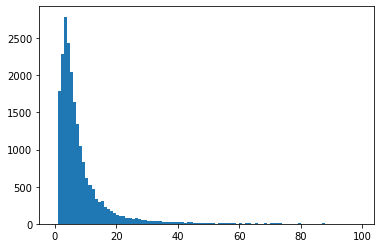

In [ ]:
len_distribution_array = np.array(len_distribution)

plt.hist(len_distribution_array, bins = np.arange(0,100,1))
plt.show()

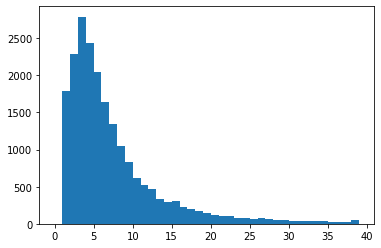

In [ ]:
plt.hist(len_distribution_array, bins = np.arange(0,40,1))
plt.show()

In [ ]:
sentence_len = 15

In [ ]:
for i in tqdm(range(len(embedding_model.wv.vectors))):
    embedding_matrix[i+1] = embedding_model.wv.vectors[i]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 283367/283367 [00:00<00:00, 862283.31it/s]


In [ ]:
embedding_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
embedding_matrix[1] # = embedding_model.wv.get_vector('„Öà„Ö£„Ñ¥„Öâ„Öè_')

array([-0.35807574,  0.24967086, -0.39211652,  0.22270921, -0.30095124,
       -0.26930484, -0.03055471,  0.41335186, -0.10280499,  1.04495716,
        0.38705868,  0.25030985,  0.53404438, -0.11750946, -0.08750965,
        0.60228211, -0.71285009,  0.28803402,  0.62504017, -0.72744119,
       -0.38887247, -0.82178622,  0.23845713,  0.21378914, -0.11827174,
        0.56078953, -0.0617753 ,  0.48724902, -0.79592478, -1.35844982,
        0.05636201,  0.11509445,  0.2918855 ,  0.14894316, -1.5500443 ,
        0.80187112,  0.74725366,  0.66799784,  0.0449916 ,  1.63526201,
        0.19985682, -0.44706652,  0.01261949, -0.24851829,  0.59905064,
        1.25523901, -0.36310238,  0.61766183, -1.02303135,  0.11231538,
        0.19976164, -0.62349337, -0.20289727,  0.4597294 ,  0.72283882,
        0.2155575 , -0.50266254, -0.46275043, -0.02873549,  0.60092735,
        0.9514901 , -0.03955876, -0.46764556,  0.25555587,  0.62848908,
       -0.3047173 , -0.29829472, -0.07919572, -0.28102809, -0.86

In [ ]:
# X_train = X_train.apply(lambda row : jamo_sentence(str(row['comment'])).strip().split(" "), axis=1)

word_seq_train = X_train.apply(lambda row : sen_to_seq(row))
word_seq_test = X_test.apply(lambda row : sen_to_seq(row))

word_seq_train.head(5)

7959                 [0, 0, 1259, 78093]
2712                          [0, 20889]
13606                             [0, 0]
18062                           [147868]
113      [464, 28559, 65920, 53799, 464]
dtype: object

In [ ]:
word_seq_train = word_seq_train.apply(lambda row : seq_padding(row, sentence_len))
word_seq_test = word_seq_test.apply(lambda row : seq_padding(row, sentence_len))

word_seq_train.head(5)

7959     [0, 0, 1259, 78093, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
2712     [0, 20889, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
13606        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
18062    [147868, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
113      [464, 28559, 65920, 53799, 464, 0, 0, 0, 0, 0,...
dtype: object

In [ ]:
word_seq_train = np.array(word_seq_train.to_list())
word_seq_test = np.array(word_seq_test.to_list())

word_seq_train

array([[     0,      0,   1259, ...,      0,      0,      0],
       [     0,  20889,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      0],
       ...,
       [   115,   8278,   3291, ...,      0,      0,      0],
       [ 11473,  66961,    572, ...,      0,      0,      0],
       [  1583, 137346,      2, ...,      0,      0,      0]])

#### modeling

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# from keras.utils import plot_model

In [ ]:
# set target data
y_train_catg = to_categorical(y_train, num_classes=7)
y_test_catg = to_categorical(y_test, num_classes=7)

y_train_catg

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

##### LSTM model

In [ ]:
lstm_model = Sequential()

e = Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=sentence_len, trainable=False) # input_length = sentence_len
lstm_model.add(e)
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(LSTM(32, return_sequences=False))
# lstm_model.add(BatchNormalization())
lstm_model.add(Dense(16, activation = 'tanh'))
lstm_model.add(Dense(7, activation = 'softmax')) # Ïó¨Í∏∞ÏÑú 3ÏùÄ ÏµúÏ¢Ö ÎùºÎ≤® Í∞ØÏàò

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 15, 100)           28336800  
_________________________________________________________________
lstm_6 (LSTM)                (None, 15, 64)            42240     
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 119       
Total params: 28,392,103
Trainable params: 55,303
Non-trainable params: 28,336,800
_________________________________________________________________


In [ ]:
checkpoint_path = '/content/drive/Shareddrives/[GH x Sandbox]/code/DeepLevel/model/lstm_jamo_7.ckpt'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=False,
                             save_best_only=True,
                             monitor='val_acc',
                             verbose=1)


lstm_model.fit(word_seq_train, y_train_catg, 
               epochs=30, verbose=2, 
               validation_data=(word_seq_test, y_test_catg),
               callbacks=[checkpoint])

Epoch 1/30
657/657 - 6s - loss: 1.1734 - acc: 0.6206 - val_loss: 1.0569 - val_acc: 0.6540

Epoch 00001: val_acc improved from -inf to 0.65400, saving model to /content/drive/Shareddrives/[GH x Sandbox]/code/DeepLevel/model/lstm_jamo_7.ckpt


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/[GH x Sandbox]/code/DeepLevel/model/lstm_jamo_7.ckpt/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/[GH x Sandbox]/code/DeepLevel/model/lstm_jamo_7.ckpt/assets


Epoch 2/30
657/657 - 3s - loss: 1.0580 - acc: 0.6486 - val_loss: 1.0375 - val_acc: 0.6490

Epoch 00002: val_acc did not improve from 0.65400
Epoch 3/30
657/657 - 3s - loss: 1.0264 - acc: 0.6554 - val_loss: 1.0419 - val_acc: 0.6620

Epoch 00003: val_acc improved from 0.65400 to 0.66200, saving model to /content/drive/Shareddrives/[GH x Sandbox]/code/DeepLevel/model/lstm_jamo_7.ckpt


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/[GH x Sandbox]/code/DeepLevel/model/lstm_jamo_7.ckpt/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/[GH x Sandbox]/code/DeepLevel/model/lstm_jamo_7.ckpt/assets


Epoch 4/30
657/657 - 3s - loss: 0.9976 - acc: 0.6652 - val_loss: 1.0440 - val_acc: 0.6530

Epoch 00004: val_acc did not improve from 0.66200
Epoch 5/30
657/657 - 3s - loss: 0.9767 - acc: 0.6691 - val_loss: 1.0368 - val_acc: 0.6510

Epoch 00005: val_acc did not improve from 0.66200
Epoch 6/30
657/657 - 3s - loss: 0.9530 - acc: 0.6753 - val_loss: 1.0391 - val_acc: 0.6440

Epoch 00006: val_acc did not improve from 0.66200
Epoch 7/30
657/657 - 3s - loss: 0.9278 - acc: 0.6843 - val_loss: 1.0552 - val_acc: 0.6400

Epoch 00007: val_acc did not improve from 0.66200
Epoch 8/30
657/657 - 3s - loss: 0.9040 - acc: 0.6917 - val_loss: 1.0682 - val_acc: 0.6530

Epoch 00008: val_acc did not improve from 0.66200
Epoch 9/30
657/657 - 3s - loss: 0.8741 - acc: 0.7015 - val_loss: 1.0904 - val_acc: 0.6380

Epoch 00009: val_acc did not improve from 0.66200
Epoch 10/30
657/657 - 3s - loss: 0.8453 - acc: 0.7089 - val_loss: 1.1142 - val_acc: 0.6470

Epoch 00010: val_acc did not improve from 0.66200
Epoch 11/30


In [ ]:
# save_options = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
saved_model_path = '/content/drive/Shareddrives/[GH x Sandbox]/code/DeepLevel/model/lstm_jamo7_model_h5'
lstm_model.save(saved_model_path, save_format='h5') #, options=save_options)

In [ ]:
config = lstm_model.get_config()
config

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 15),
    'dtype': 'float32',
    'name': 'embedding_3_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Embedding',
   'config': {'activity_regularizer': None,
    'batch_input_shape': (None, 15),
    'dtype': 'float32',
    'embeddings_constraint': None,
    'embeddings_initializer': {'class_name': 'RandomUniform',
     'config': {'maxval': 0.05, 'minval': -0.05, 'seed': None}},
    'embeddings_regularizer': None,
    'input_dim': 283368,
    'input_length': 15,
    'mask_zero': False,
    'name': 'embedding_3',
    'output_dim': 100,
    'trainable': False}},
  {'class_name': 'LSTM',
   'config': {'activation': 'tanh',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dropout': 0.0,
    'dtype': 'float32',
    'go_backwards': False,
    'implementation': 2,
    'kernel_cons

##### CNN model

In [ ]:
CNN_input = Input(shape = (sentence_len,))
Embedded = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=sentence_len, trainable=False)(CNN_input)
Permuted = Permute(dims = (2,1))(Embedded)
CONV1 = Conv1D(filters = 70, kernel_size= 3, padding = 'same')(Permuted)
CONV1 = ReLU()(CONV1)
Pooled1 = MaxPool1D(CONV1.shape[1])(CONV1)
Flattened1 = Flatten()(Pooled1)

CONV2 = Conv1D(filters = 70, kernel_size= 4, padding = 'same')(Permuted)
CONV2 = ReLU()(CONV2)
Pooled2 = MaxPool1D(CONV2.shape[1])(CONV2)
Flattened2 = Flatten()(Pooled2)

CONV3 = Conv1D(filters = 70, kernel_size= 5, padding = 'same')(Permuted)
CONV3 = ReLU()(CONV3)
Pooled3 = MaxPool1D(CONV3.shape[1])(CONV3)
Flattened3 = Flatten()(Pooled3)

Merged = Concatenate()([Flattened1, Flattened2, Flattened3])
CNN_output = Dense(3, activation='softmax')(Merged)

In [ ]:
CNN_model = Model(CNN_input, CNN_output)
CNN_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 15, 100)      28336800    input_2[0][0]                    
__________________________________________________________________________________________________
permute (Permute)               (None, 100, 15)      0           embedding[0][0]                  
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 100, 70)      3220        permute[0][0]                    
______________________________________________________________________________________________

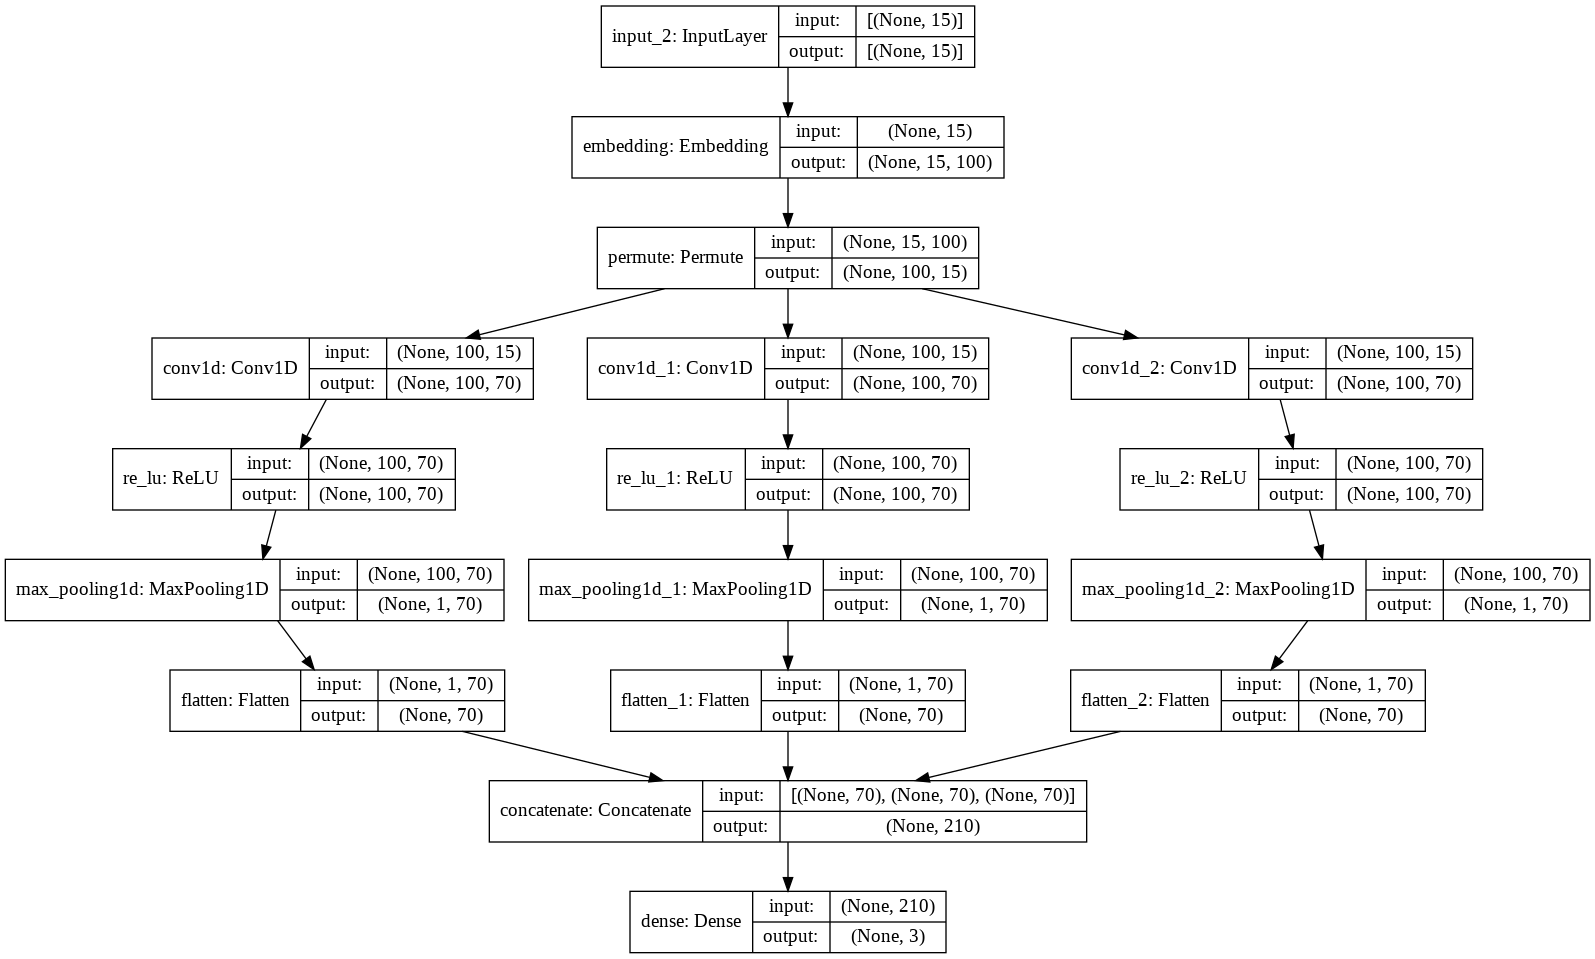

In [ ]:
plot_model(CNN_model, "cnn.png", show_shapes=True)

In [ ]:
CNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
CNN_model.fit(word_seq_train, y_train_catg, epochs=30, verbose=2, validation_data=(word_seq_test, y_test_catg))

Epoch 1/30
313/313 - 34s - loss: 0.9745 - acc: 0.5340
Epoch 2/30
313/313 - 1s - loss: 0.9086 - acc: 0.5806
Epoch 3/30
313/313 - 1s - loss: 0.8703 - acc: 0.6093
Epoch 4/30
313/313 - 1s - loss: 0.8329 - acc: 0.6418
Epoch 5/30
313/313 - 1s - loss: 0.8061 - acc: 0.6586
Epoch 6/30
313/313 - 1s - loss: 0.7761 - acc: 0.6766
Epoch 7/30
313/313 - 1s - loss: 0.7575 - acc: 0.6869
Epoch 8/30
313/313 - 1s - loss: 0.7296 - acc: 0.7066
Epoch 9/30
313/313 - 1s - loss: 0.7091 - acc: 0.7119
Epoch 10/30
313/313 - 1s - loss: 0.6878 - acc: 0.7228
Epoch 11/30
313/313 - 1s - loss: 0.6698 - acc: 0.7363
Epoch 12/30
313/313 - 1s - loss: 0.6474 - acc: 0.7471
Epoch 13/30
313/313 - 1s - loss: 0.6319 - acc: 0.7540
Epoch 14/30
313/313 - 1s - loss: 0.6167 - acc: 0.7605
Epoch 15/30
313/313 - 1s - loss: 0.6015 - acc: 0.7669
Epoch 16/30
313/313 - 1s - loss: 0.5861 - acc: 0.7763
Epoch 17/30
313/313 - 1s - loss: 0.5740 - acc: 0.7775
Epoch 18/30
313/313 - 1s - loss: 0.5601 - acc: 0.7835
Epoch 19/30
313/313 - 1s - loss: 0.5

# Model Load Test

In [ ]:
model = Sequential.from_config(config)

# e = Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=sentence_len, trainable=False) # input_length = sentence_len
# model.add(e)
# model.add(LSTM(64, return_sequences=True))
# model.add(LSTM(32, return_sequences=False))
# # lstm_model.add(BatchNormalization())
# model.add(Dense(16, activation = 'tanh'))
# model.add(Dense(7, activation = 'softmax')) # Ïó¨Í∏∞ÏÑú 3ÏùÄ ÏµúÏ¢Ö ÎùºÎ≤® Í∞ØÏàò

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 15, 100)           28336800  
_________________________________________________________________
lstm_6 (LSTM)                (None, 15, 64)            42240     
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 119       
Total params: 28,392,103
Trainable params: 55,303
Non-trainable params: 28,336,800
_________________________________________________________________


In [ ]:
model.evaluate(word_seq_test,  y_test_catg, verbose=2)

32/32 - 1s - loss: 1.9419 - acc: 0.0520


[1.9419199228286743, 0.052000001072883606]

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model(saved_model_path, options=load_options)

In [ ]:
model.evaluate(word_seq_test,  y_test_catg, verbose=2)

32/32 - 13s - loss: 1.8720 - acc: 0.6170


[1.872029423713684, 0.6169999837875366]